In [1]:
import pandas as pd

# read file
data_file = "winequality-white.csv"
df = pd.read_csv(data_file, sep=";")
print(df.head(10))

#get X and y
X = df.drop(columns=['quality'])
y = df['quality']

c:\Users\Administrator\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0

In [2]:
print(X.describe())
print(X.dtypes)
print(X.isnull().sum())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

[6 5 7 8 4 3 9]


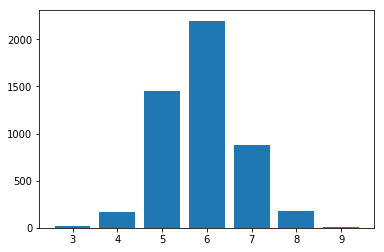

In [4]:
print(y.unique())
import seaborn as sns
import matplotlib.pyplot as plt
plt.bar(y.value_counts().index, y.value_counts().values)
plt.show()

In [17]:
# split dataset into train data(80%) and test data(20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [18]:
# 样本极端不平衡，先对训练集做一个平衡
from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSample
ros = SMOTE(k_neighbors=3,random_state=42)

# 应用过采样到数据集
X_train, y_train = ros.fit_resample(X_train, y_train)

In [19]:
print(y_train.value_counts())
print(y_test.value_counts())

6    1766
5    1766
7    1766
3    1766
4    1766
8    1766
9    1766
Name: quality, dtype: int64
6    432
5    291
7    192
8     35
4     25
3      5
Name: quality, dtype: int64


In [20]:
# normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [21]:
# SVM MODEL
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

svm_model = SVC(C=1.0, gamma=1.617, kernel='rbf',random_state=42)
# svm_model = RandomForestClassifier(max_depth=100, random_state=0)

svm_model.fit(X_train_normalized, y_train)
y_pred = svm_model.predict(X_test_normalized)
# score in this model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
#print result
print("Accuracy on SVM is:", accuracy)
print("SVM's recall score is:", recall)
print("SVM's f1 score is:", f1)
print("Confusion matrix is:")
print(conf_matrix)

Accuracy on SVM is: 0.6520408163265307
SVM's recall score is: 0.6520408163265307
SVM's f1 score is: 0.6441725365369555
Confusion matrix is:
[[  0   0   0   5   0   0   0]
 [  0   5   3  17   0   0   0]
 [  0   4 169 110   8   0   0]
 [  0   2  53 343  30   4   0]
 [  0   0   6  75 106   5   0]
 [  0   0   1  14   3  16   1]
 [  0   0   0   0   0   0   0]]


c:\Users\Administrator\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:

#HACK：搜索最佳参数
# import numpy as np

# # 网格搜索超参
# for c in np.linspace(1,10,100):
#     for g in np.linspace(0.001,10,100):
#         svm_model = SVC(C=c, gamma=g, kernel='rbf',random_state=42)
#         svm_model.fit(X_train_normalized, y_train)
#         y_pred = svm_model.predict(X_test_normalized)
#         # score in this model
#         accuracy = accuracy_score(y_test, y_pred)

#         print('C = {}, gamma ={}, acc = {}'.format(c, g, accuracy))

C = 1.0, gamma =0.001, acc = 0.48775510204081635
C = 1.0, gamma =0.10200000000000001, acc = 0.5612244897959183
C = 1.0, gamma =0.203, acc = 0.5785714285714286
C = 1.0, gamma =0.30400000000000005, acc = 0.5989795918367347
C = 1.0, gamma =0.405, acc = 0.6122448979591837
C = 1.0, gamma =0.506, acc = 0.6357142857142857
C = 1.0, gamma =0.6070000000000001, acc = 0.639795918367347
C = 1.0, gamma =0.7080000000000001, acc = 0.6346938775510204
C = 1.0, gamma =0.809, acc = 0.6306122448979592
C = 1.0, gamma =0.91, acc = 0.6346938775510204
C = 1.0, gamma =1.011, acc = 0.639795918367347
C = 1.0, gamma =1.1119999999999999, acc = 0.6448979591836734
C = 1.0, gamma =1.213, acc = 0.6530612244897959
C = 1.0, gamma =1.314, acc = 0.6571428571428571
C = 1.0, gamma =1.415, acc = 0.6581632653061225
C = 1.0, gamma =1.516, acc = 0.6561224489795918
C = 1.0, gamma =1.617, acc = 0.6530612244897959
C = 1.0, gamma =1.718, acc = 0.6520408163265307
C = 1.0, gamma =1.819, acc = 0.6510204081632653
C = 1.0, gamma =1.92, a

KeyboardInterrupt: 

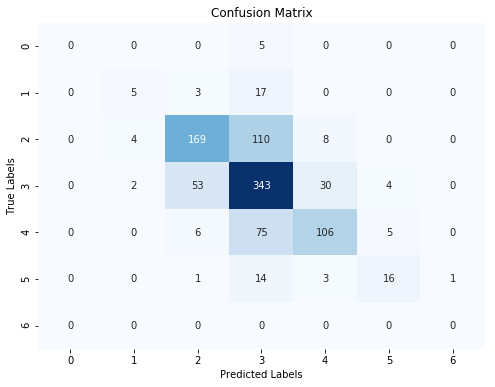

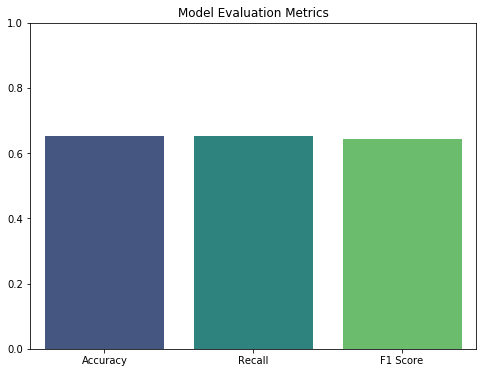

In [22]:
# SVM result visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
metrics = ['Accuracy', 'Recall', 'F1 Score']
scores = [accuracy, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()